In [1]:
import pymysql
connection = pymysql.connect(host='localhost',
                             user='mgo',
                             password='mgomgo@Mysql1',
                             database='Test',
                             cursorclass=pymysql.cursors.DictCursor)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_sql('SELECT * FROM Downloads_bets', con=connection)
df.head()

,date,id,bet_number
0,2020/3/25 11:18:00,1,2.47
1,2020/3/25 11:18:00,2,78.84
2,2020/3/25 11:19:00,3,2.63
3,2020/3/25 11:19:00,4,1.95
4,2020/3/25 11:20:00,5,19.75


### Data Transformation

In [4]:
df.drop('id',axis=1,inplace=True)

In [5]:
df.head()

,date,bet_number
0,2020/3/25 11:18:00,2.47
1,2020/3/25 11:18:00,78.84
2,2020/3/25 11:19:00,2.63
3,2020/3/25 11:19:00,1.95
4,2020/3/25 11:20:00,19.75


In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.head()

,date,bet_number
0,2020-03-25 11:18:00,2.47
1,2020-03-25 11:18:00,78.84
2,2020-03-25 11:19:00,2.63
3,2020-03-25 11:19:00,1.95
4,2020-03-25 11:20:00,19.75


In [25]:
day = df[(df['date'] > '2020-03-25') & (df['date'] < '2020-03-26')]

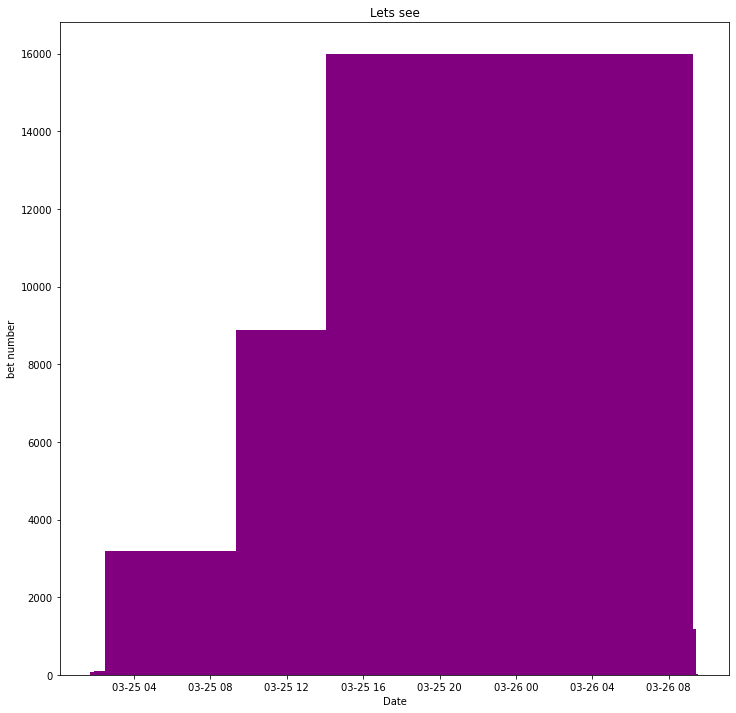

In [9]:
# # Create figure and plot space
# fig, ax = plt.subplots(figsize=(12, 12))
#
# # Add x-axis and y-axis
# ax.bar(day['date'],
#        day['bet_number'],
#        color='purple')
#
# # Set title and labels for axes
# ax.set(xlabel="Date",
#        ylabel="bet number",
#        title="Lets see")
#
# plt.show()

In [26]:
dayFilter = day.duplicated(subset=['date'])

In [44]:
def changeDate(x,y):
    print(x,y)


day['date'].apply(changeDate,axis=1)


AttributeError: 'Series' object has no attribute 'iterrows'